<a href="https://colab.research.google.com/github/oroobyaseen/coursera.exercises/blob/gh-pages/VGG1999.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation,MaxPooling2D,Dropout
from keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from tensorflow.keras.models import load_model
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping,LearningRateScheduler,CSVLogger,LambdaCallback,TensorBoard
from keras import regularizers
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.regularizers import l2
import seaborn as sns
import math
import os
import keras 
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
%matplotlib inline

In [29]:
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
train_path = '/content/drive/MyDrive/Lec/Train'
valid_path = '/content/drive/MyDrive/Lec/Val'
#test_path  = '/content/drive/MyDrive/New folder (6)/test'
train_gen = ImageDataGenerator(
    rescale=1./255,
                                   
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True
)
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
    height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

train_batches = train_gen.flow_from_directory(directory=train_path, target_size=(224,224),
    classes=['Glioma', 'Meningioma', 'Pituitary tumor'], batch_size=128)

valid_batches = ImageDataGenerator( rescale=1./255).flow_from_directory(directory=valid_path, target_size=(224,224), 
    classes=['Glioma', 'Meningioma', 'Pituitary tumor'], batch_size=128, shuffle=False)
#test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224),
 #   classes=['Glioma', 'Meningioma', 'Pituitary tumor'], batch_size=128,shuffle=False)

Found 2516 images belonging to 3 classes.
Found 616 images belonging to 3 classes.


In [22]:

IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#here [3] denotes for RGB images(3 channels)

#don't train existing weights
for layer in vgg.layers:
 layer.trainable = False
 
x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(loss='categorical_crossentropy',
                    optimizer=optimizers.Adam(),
                    metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [9]:


model5_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 6, verbose = 1)
model5_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model5_mcp = ModelCheckpoint(filepath = 'model5_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

In [23]:
history = model.fit_generator(generator=train_batches,
                                    #steps_per_epoch=len(train_batches),
                                 validation_data=valid_batches, 
                                 #validation_steps=len(valid_batches), 
                                    epochs=50, verbose=1, callbacks=[model5_es, model5_rlr, model5_mcp])

<ipython-input-23-f4ee092c72ba>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_batches,


Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 1.1430 - accuracy: 0.5906

20/20 [==============================] - 43s 2s/step - loss: 1.1430 - accuracy: 0.5906 - val_loss: 0.5792 - val_accuracy: 0.7386 - lr: 0.0010
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 0.4345 - accuracy: 0.8255

20/20 [==============================] - 41s 2s/step - loss: 0.4345 - accuracy: 0.8255 - val_loss: 0.3326 - val_accuracy: 0.8620 - lr: 0.0010
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 0.3235 - accuracy: 0.8780

20/20 [==============================] - 41s 2s/step - loss: 0.3235 - accuracy: 0.8780 - val_loss: 0.3601 - val_accuracy: 0.8360 - lr: 0.0010
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 0.3069 - accuracy: 0.8831

20/20 [==============================] - 42s 2s/step - loss: 0.3069 - accuracy: 0.8831 - val_loss: 0.3033 - val_accuracy: 0.8815 - lr: 0.0010
Epoch 5/50
20/20 [==============================] - ETA: 0s - loss: 0.2836 - accuracy: 0.8812

20/20 [==============================] - 41s 2s/step - loss: 0.2836 - accuracy: 0.8812 - val_loss: 0.3377 - val_accuracy: 0.8425 - lr: 0.0010
Epoch 6/50
20/20 [==============================] - ETA: 0s - loss: 0.2658 - accuracy: 0.8899

20/20 [==============================] - 41s 2s/step - loss: 0.2658 - accuracy: 0.8899 - val_loss: 0.2601 - val_accuracy: 0.8994 - lr: 0.0010
Epoch 7/50
20/20 [==============================] - ETA: 0s - loss: 0.2094 - accuracy: 0.9225

20/20 [==============================] - 41s 2s/step - loss: 0.2094 - accuracy: 0.9225 - val_loss: 0.2490 - val_accuracy: 0.9026 - lr: 0.0010
Epoch 8/50
20/20 [==============================] - ETA: 0s - loss: 0.1980 - accuracy: 0.9261

20/20 [==============================] - 41s 2s/step - loss: 0.1980 - accuracy: 0.9261 - val_loss: 0.2263 - val_accuracy: 0.9237 - lr: 0.0010
Epoch 9/50
20/20 [==============================] - ETA: 0s - loss: 0.1805 - accuracy: 0.9364

20/20 [==============================] - 41s 2s/step - loss: 0.1805 - accuracy: 0.9364 - val_loss: 0.2561 - val_accuracy: 0.8896 - lr: 0.0010
Epoch 10/50
20/20 [==============================] - ETA: 0s - loss: 0.1765 - accuracy: 0.9424

20/20 [==============================] - 41s 2s/step - loss: 0.1765 - accuracy: 0.9424 - val_loss: 0.2151 - val_accuracy: 0.9188 - lr: 0.0010
Epoch 11/50
20/20 [==============================] - ETA: 0s - loss: 0.1624 - accuracy: 0.9479

20/20 [==============================] - 41s 2s/step - loss: 0.1624 - accuracy: 0.9479 - val_loss: 0.2157 - val_accuracy: 0.9123 - lr: 0.0010
Epoch 12/50
20/20 [==============================] - ETA: 0s - loss: 0.1582 - accuracy: 0.9448

20/20 [==============================] - 41s 2s/step - loss: 0.1582 - accuracy: 0.9448 - val_loss: 0.2105 - val_accuracy: 0.9205 - lr: 0.0010
Epoch 13/50
20/20 [==============================] - ETA: 0s - loss: 0.1393 - accuracy: 0.9575

20/20 [==============================] - 42s 2s/step - loss: 0.1393 - accuracy: 0.9575 - val_loss: 0.2169 - val_accuracy: 0.9075 - lr: 0.0010
Epoch 14/50
20/20 [==============================] - ETA: 0s - loss: 0.1383 - accuracy: 0.9595

20/20 [==============================] - 41s 2s/step - loss: 0.1383 - accuracy: 0.9595 - val_loss: 0.2029 - val_accuracy: 0.9269 - lr: 0.0010
Epoch 15/50
20/20 [==============================] - ETA: 0s - loss: 0.1541 - accuracy: 0.9400

20/20 [==============================] - 41s 2s/step - loss: 0.1541 - accuracy: 0.9400 - val_loss: 0.3052 - val_accuracy: 0.8523 - lr: 0.0010
Epoch 16/50
20/20 [==============================] - ETA: 0s - loss: 0.1410 - accuracy: 0.9519

20/20 [==============================] - 41s 2s/step - loss: 0.1410 - accuracy: 0.9519 - val_loss: 0.1932 - val_accuracy: 0.9286 - lr: 0.0010
Epoch 17/50
20/20 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.9607

20/20 [==============================] - 41s 2s/step - loss: 0.1202 - accuracy: 0.9607 - val_loss: 0.1895 - val_accuracy: 0.9318 - lr: 0.0010
Epoch 18/50
20/20 [==============================] - ETA: 0s - loss: 0.1129 - accuracy: 0.9698

20/20 [==============================] - 41s 2s/step - loss: 0.1129 - accuracy: 0.9698 - val_loss: 0.1867 - val_accuracy: 0.9269 - lr: 0.0010
Epoch 19/50
20/20 [==============================] - ETA: 0s - loss: 0.1018 - accuracy: 0.9726

20/20 [==============================] - 42s 2s/step - loss: 0.1018 - accuracy: 0.9726 - val_loss: 0.1795 - val_accuracy: 0.9253 - lr: 0.0010
Epoch 20/50
20/20 [==============================] - ETA: 0s - loss: 0.1020 - accuracy: 0.9678

20/20 [==============================] - 41s 2s/step - loss: 0.1020 - accuracy: 0.9678 - val_loss: 0.1910 - val_accuracy: 0.9286 - lr: 0.0010
Epoch 21/50
20/20 [==============================] - ETA: 0s - loss: 0.0957 - accuracy: 0.9766

20/20 [==============================] - 41s 2s/step - loss: 0.0957 - accuracy: 0.9766 - val_loss: 0.1686 - val_accuracy: 0.9351 - lr: 0.0010
Epoch 22/50
20/20 [==============================] - ETA: 0s - loss: 0.0878 - accuracy: 0.9797

20/20 [==============================] - 41s 2s/step - loss: 0.0878 - accuracy: 0.9797 - val_loss: 0.1916 - val_accuracy: 0.9221 - lr: 0.0010
Epoch 23/50
20/20 [==============================] - ETA: 0s - loss: 0.0843 - accuracy: 0.9777

20/20 [==============================] - 41s 2s/step - loss: 0.0843 - accuracy: 0.9777 - val_loss: 0.1690 - val_accuracy: 0.9416 - lr: 0.0010
Epoch 24/50
20/20 [==============================] - ETA: 0s - loss: 0.0965 - accuracy: 0.9722

20/20 [==============================] - 41s 2s/step - loss: 0.0965 - accuracy: 0.9722 - val_loss: 0.1652 - val_accuracy: 0.9318 - lr: 0.0010
Epoch 25/50
20/20 [==============================] - ETA: 0s - loss: 0.0822 - accuracy: 0.9833

20/20 [==============================] - 41s 2s/step - loss: 0.0822 - accuracy: 0.9833 - val_loss: 0.1665 - val_accuracy: 0.9513 - lr: 0.0010
Epoch 26/50
20/20 [==============================] - ETA: 0s - loss: 0.0875 - accuracy: 0.9750

20/20 [==============================] - 41s 2s/step - loss: 0.0875 - accuracy: 0.9750 - val_loss: 0.1731 - val_accuracy: 0.9318 - lr: 0.0010
Epoch 27/50
20/20 [==============================] - ETA: 0s - loss: 0.0738 - accuracy: 0.9837

20/20 [==============================] - 41s 2s/step - loss: 0.0738 - accuracy: 0.9837 - val_loss: 0.1609 - val_accuracy: 0.9399 - lr: 0.0010
Epoch 28/50
20/20 [==============================] - ETA: 0s - loss: 0.0726 - accuracy: 0.9817

20/20 [==============================] - 41s 2s/step - loss: 0.0726 - accuracy: 0.9817 - val_loss: 0.1655 - val_accuracy: 0.9432 - lr: 0.0010
Epoch 29/50
20/20 [==============================] - ETA: 0s - loss: 0.0805 - accuracy: 0.9777

20/20 [==============================] - 41s 2s/step - loss: 0.0805 - accuracy: 0.9777 - val_loss: 0.1920 - val_accuracy: 0.9172 - lr: 0.0010
Epoch 30/50
20/20 [==============================] - ETA: 0s - loss: 0.0714 - accuracy: 0.9813

20/20 [==============================] - 41s 2s/step - loss: 0.0714 - accuracy: 0.9813 - val_loss: 0.1920 - val_accuracy: 0.9123 - lr: 0.0010
Epoch 31/50
20/20 [==============================] - ETA: 0s - loss: 0.0843 - accuracy: 0.9738

20/20 [==============================] - 41s 2s/step - loss: 0.0843 - accuracy: 0.9738 - val_loss: 0.1606 - val_accuracy: 0.9464 - lr: 0.0010
Epoch 32/50
20/20 [==============================] - ETA: 0s - loss: 0.0707 - accuracy: 0.9837

20/20 [==============================] - 42s 2s/step - loss: 0.0707 - accuracy: 0.9837 - val_loss: 0.1646 - val_accuracy: 0.9334 - lr: 0.0010
Epoch 33/50
20/20 [==============================] - ETA: 0s - loss: 0.0622 - accuracy: 0.9853

20/20 [==============================] - 41s 2s/step - loss: 0.0622 - accuracy: 0.9853 - val_loss: 0.1863 - val_accuracy: 0.9172 - lr: 0.0010
Epoch 34/50
20/20 [==============================] - ETA: 0s - loss: 0.0604 - accuracy: 0.9857

20/20 [==============================] - 41s 2s/step - loss: 0.0604 - accuracy: 0.9857 - val_loss: 0.1821 - val_accuracy: 0.9237 - lr: 0.0010
Epoch 35/50
20/20 [==============================] - ETA: 0s - loss: 0.0561 - accuracy: 0.9924

20/20 [==============================] - 41s 2s/step - loss: 0.0561 - accuracy: 0.9924 - val_loss: 0.1779 - val_accuracy: 0.9123 - lr: 0.0010
Epoch 36/50
20/20 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9909

20/20 [==============================] - 41s 2s/step - loss: 0.0551 - accuracy: 0.9909 - val_loss: 0.1601 - val_accuracy: 0.9351 - lr: 0.0010
Epoch 37/50
20/20 [==============================] - ETA: 0s - loss: 0.0645 - accuracy: 0.9845

20/20 [==============================] - 41s 2s/step - loss: 0.0645 - accuracy: 0.9845 - val_loss: 0.1884 - val_accuracy: 0.9058 - lr: 0.0010
Epoch 38/50
20/20 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.9889

20/20 [==============================] - 41s 2s/step - loss: 0.0568 - accuracy: 0.9889 - val_loss: 0.1693 - val_accuracy: 0.9253 - lr: 0.0010
Epoch 39/50
20/20 [==============================] - ETA: 0s - loss: 0.0582 - accuracy: 0.9893

20/20 [==============================] - 42s 2s/step - loss: 0.0582 - accuracy: 0.9893 - val_loss: 0.1533 - val_accuracy: 0.9399 - lr: 0.0010
Epoch 40/50
20/20 [==============================] - ETA: 0s - loss: 0.0489 - accuracy: 0.9901

20/20 [==============================] - 40s 2s/step - loss: 0.0489 - accuracy: 0.9901 - val_loss: 0.1831 - val_accuracy: 0.9156 - lr: 0.0010
Epoch 41/50
20/20 [==============================] - ETA: 0s - loss: 0.0517 - accuracy: 0.9901

20/20 [==============================] - 40s 2s/step - loss: 0.0517 - accuracy: 0.9901 - val_loss: 0.1901 - val_accuracy: 0.9075 - lr: 0.0010
Epoch 42/50
20/20 [==============================] - ETA: 0s - loss: 0.0490 - accuracy: 0.9897

20/20 [==============================] - 40s 2s/step - loss: 0.0490 - accuracy: 0.9897 - val_loss: 0.1503 - val_accuracy: 0.9383 - lr: 0.0010
Epoch 43/50
20/20 [==============================] - ETA: 0s - loss: 0.0509 - accuracy: 0.9897

20/20 [==============================] - 43s 2s/step - loss: 0.0509 - accuracy: 0.9897 - val_loss: 0.1577 - val_accuracy: 0.9318 - lr: 0.0010
Epoch 44/50
20/20 [==============================] - ETA: 0s - loss: 0.0470 - accuracy: 0.9944

20/20 [==============================] - 41s 2s/step - loss: 0.0470 - accuracy: 0.9944 - val_loss: 0.1546 - val_accuracy: 0.9367 - lr: 0.0010
Epoch 45/50
20/20 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9928

20/20 [==============================] - 42s 2s/step - loss: 0.0427 - accuracy: 0.9928 - val_loss: 0.1542 - val_accuracy: 0.9334 - lr: 0.0010
Epoch 46/50
20/20 [==============================] - ETA: 0s - loss: 0.0453 - accuracy: 0.9905

20/20 [==============================] - 41s 2s/step - loss: 0.0453 - accuracy: 0.9905 - val_loss: 0.1546 - val_accuracy: 0.9351 - lr: 0.0010
Epoch 47/50
20/20 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9932

20/20 [==============================] - 40s 2s/step - loss: 0.0438 - accuracy: 0.9932 - val_loss: 0.1764 - val_accuracy: 0.9237 - lr: 0.0010
Epoch 48/50
20/20 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9924
Epoch 48: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.


20/20 [==============================] - 40s 2s/step - loss: 0.0449 - accuracy: 0.9924 - val_loss: 0.1587 - val_accuracy: 0.9383 - lr: 0.0010
Epoch 49/50
20/20 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9936

20/20 [==============================] - 40s 2s/step - loss: 0.0412 - accuracy: 0.9936 - val_loss: 0.1631 - val_accuracy: 0.9302 - lr: 2.0000e-04
Epoch 50/50
20/20 [==============================] - ETA: 0s - loss: 0.0380 - accuracy: 0.9952

20/20 [==============================] - 40s 2s/step - loss: 0.0380 - accuracy: 0.9952 - val_loss: 0.1675 - val_accuracy: 0.9188 - lr: 2.0000e-04


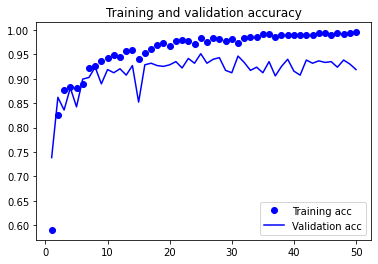

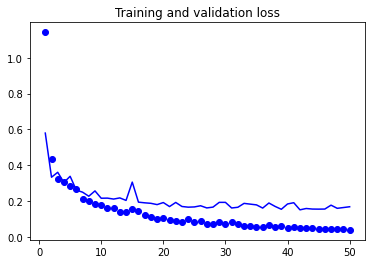

In [24]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.savefig('accuracy.png')
plt.show()

In [26]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [27]:
test_model = load_model('model_vgg19.h5')

<ipython-input-30-9fff1a42e9c6>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_1 = test_model.predict_generator(generator=valid_batches, steps=len(valid_batches), verbose=0)


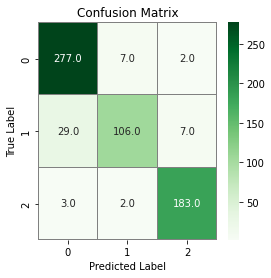

<Figure size 432x288 with 0 Axes>

In [30]:
predictions_1 = test_model.predict_generator(generator=valid_batches, steps=len(valid_batches), verbose=0)

pred_label = np.argmax(predictions_1,axis=1)
classes = np.argmax(predictions_1, axis=1)
cm = confusion_matrix(valid_batches.labels,pred_label)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('confusion_matrix.png')

In [31]:
predictions = test_model.predict_generator(valid_batches, steps=1, verbose=0)

<ipython-input-31-556bd177d548>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = test_model.predict_generator(valid_batches, steps=1, verbose=0)


In [32]:
rounded_prediction = np.argmax(predictions, axis=-1)
for i in rounded_prediction:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
2
0
0
0
0
0
0
0
0
0
0
0


In [33]:
test_imgs, test_labels = next(valid_batches)
#plots(test_imgs, rows=10, titles=test_labels)

In [34]:
rounded_labels = np.argmax(test_labels, axis=-1)

In [35]:
cm = confusion_matrix(y_true=valid_batches.labels, y_pred=pred_label)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(y_true=valid_batches.labels, y_pred=pred_label))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       286
           1       0.92      0.75      0.82       142
           2       0.95      0.97      0.96       188

    accuracy                           0.92       616
   macro avg       0.92      0.90      0.91       616
weighted avg       0.92      0.92      0.92       616



In [36]:
testY = valid_batches.classes

In [37]:

class_to_label_map = {2 : 'Pituitary tumor', 1 : 'Meningioma', 0 : 'Glioma'}

In [38]:
classes = dict((v, k) for k, v in valid_batches.class_indices.items())
num_classes = len(classes)
num_samples = len(valid_batches)



In [39]:
from keras.utils.np_utils import to_categorical  


     

y_true_categorical = valid_batches.classes
y_true = (to_categorical(y_true_categorical, num_classes = num_classes))


In [41]:

y_score = model.predict_generator(valid_batches)

<ipython-input-41-d979e7f2ab99>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_score = model.predict_generator(valid_batches)


In [47]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from itertools import cycle
from sklearn import metrics
from scipy import interp
import os
import shutil
from keras import backend as K
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline




<ipython-input-48-ad3396a1dc6d>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


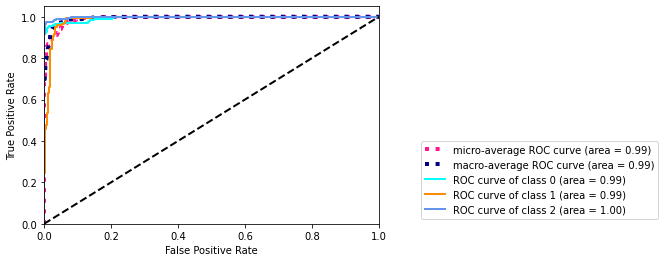

In [48]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#plt.title('Receiver operating characteristic (ROC) to Multi-Class Validation Set (' + model_name + ')')
plt.legend(bbox_to_anchor=(1.85,0), loc="lower right")
#plt.savefig(model_path + '0_results/Model' + '_' + model_name + '_' + str(epochs) + '_epochs_ROC_Validation.png', dpi=600, bbox_inches="tight")
plt.show()



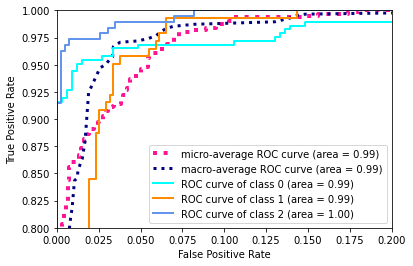

In [49]:
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=3)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



Confusion matrix, without normalization
[[132   8   4]
 [ 14  48  10]
 [  1   0  93]]


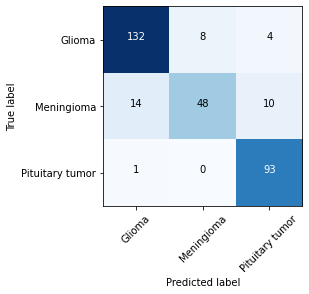

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Glioma','Meningioma', 'Pituitary tumor']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from itertools import cycle
from sklearn import metrics
from scipy import interp
import os
import shutil
from keras import backend as K
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


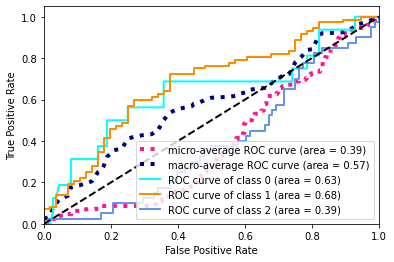

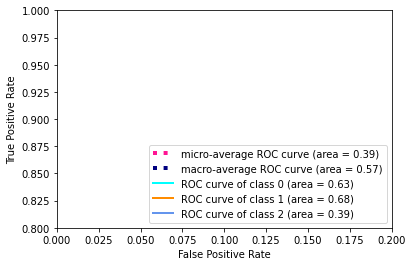

In [ ]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
classes = dict((v, k) for k, v in test_batches.class_indices.items())
num_classes = len(classes)
num_samples = len(test_batches)

In [ ]:
test_imgs, test_labels = next(test_batches)
#plots(test_imgs, rows=10, titles=test_labels)

In [ ]:
def plot_roc_curve(y_test, y_pred):
     n_classes = len(np.unique(y_test))
     y_test = label_binarize(y_test, classes=np.arange(n_classes))

     # Compute ROC curve and ROC area for each class
     fpr = dict()
     tpr = dict()
     roc_auc = dict()
     thresholds = dict()
     for i in range(n_classes):
       fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_pred[:, i], drop_intermediate=False)
     roc_auc[i] = auc(fpr[i], tpr[i])

     # Compute micro-average ROC curve and ROC area
     fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
     roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

     # First aggregate all false positive rates
     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

     # Then interpolate all ROC curves at this points
     mean_tpr = np.zeros_like(all_fpr)
     for i in range(n_classes):
       mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

     # Finally average it and compute AUC
     mean_tpr /= n_classes

     fpr["macro"] = all_fpr
     tpr["macro"] = mean_tpr
     roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

     # Plot all ROC curves
     #plt.figure(figsize=(10,5))
     plt.figure(dpi=600)
     lw = 2
     plt.plot(fpr["micro"], tpr["micro"],
     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
     color="deeppink", linestyle=":", linewidth=4,)

     plt.plot(fpr["macro"], tpr["macro"],
     label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
     color="navy", linestyle=":", linewidth=4,)

     colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
     for i, color in zip(range(n_classes), colors):
       plt.plot(fpr[i], tpr[i], color=color, lw=lw,
       label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

     plt.plot([0, 1], [0, 1], "k--", lw=lw)
     plt.xlim([0.0, 1.0])
     plt.ylim([0.0, 1.05])
     plt.xlabel("False Positive Rate")
     plt.ylabel("True Positive Rate")
     plt.title("Receiver Operating Characteristic (ROC) curve")
     plt.legend()

In [ ]:
test_model = load_model('model_vgg16.h5')

In [ ]:
plot_roc_curve(test_batches,  predictions )